In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math

In [2]:
# this whole method is from https://blog.csdn.net/guduruyu/article/details/70313176
# some question need log functions to be fitted, I take log of inputs and do linear fit after
def n_3(x, A):
    return A*x*x*x

def n_1(x, A):
    return A*x

In [3]:
x_1 = [8, 32, 128, 512, 1024]
x_2 = [8, 32, 128, 512, 1024, 4096, 4192, 8192]
y_1 = np.loadtxt('./navie_run_time.txt')
y_2 = np.loadtxt('./binary_run_time.txt')
for x in range(len(x_2)):
    x_2[x] = x_2[x]*x_2[x]*math.log(x_2[x],2)

In [4]:
a_1 = optimize.curve_fit(n_3, x_1, y_1)[0]
a_2 = a_1 *1.01
x_3 = np.arange(1, 1100, 1)
y_3 = a_2*x_3*x_3*x_3
naive_fit = [y_3[8], y_3[32], y_3[128], y_3[512], y_3[1024]]
np.savetxt('./naive fit.txt', naive_fit, fmt='%f')
print(a_1, a_2)

[8.55179267e-08] [8.63731059e-08]


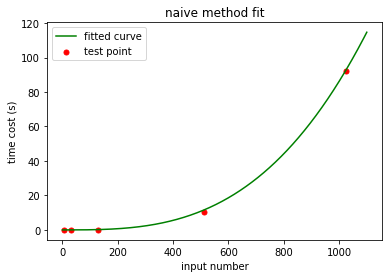

In [5]:
plt.figure()
plt.scatter(x_1, y_1, 25, 'r', label = 'test point')
plt.plot(x_3, y_3, 'g', label = 'fitted curve')
plt.legend(loc='upper left')
plt.title('naive method fit')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.savefig('./naive method fit.jpg')
plt.show()

In [6]:
b_1 = optimize.curve_fit(n_1, x_2, y_2)[0]
b_2 = b_1 * 1.08
print(b_1, b_2)
x_4 = np.arange(1, 8200, 1)
y_4 = np.zeros(len(x_4))
for x in range(len(x_4)):
    y_4[x] = (b_2*(x_4[x]**2)*math.log(x_4[x],2))
#print(x_4)
binary_fit = [y_4[8], y_4[32], y_4[128], y_4[512], y_4[1024], y_4[4096], y_4[4192], y_4[8192]]
np.savetxt('./binary fit.txt', binary_fit, fmt='%f')

[1.47263334e-07] [1.59044401e-07]


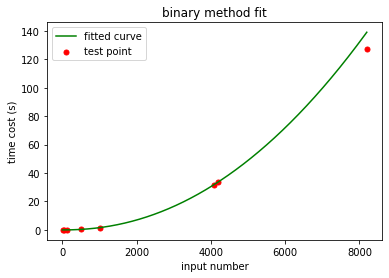

In [7]:
x_5 = [8, 32, 128, 512, 1024, 4096, 4192, 8192]
plt.figure()
plt.scatter(x_5, y_2, 25, 'r', label = 'test point')
plt.plot(x_4, y_4, 'g', label = 'fitted curve')
plt.legend(loc='upper left')
plt.title('binary method fit')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.savefig('./binary method fit.jpg')
plt.show()

In [8]:
find_input = [8, 32, 128, 512, 1024, 4096, 8192]
union_input = [8, 32, 128, 512, 1024, 4096, 8192]
weighted_input = [8, 32, 128, 512, 1024, 4096, 8192]
weighted_input_2 = [8, 32, 128, 512, 1024, 4096, 8192]
find_result = np.loadtxt('./quick find runtime.txt')
union_result = np.loadtxt('./quick union runtime.txt')
weighted_result = np.loadtxt('./weighted union runtime.txt')
for x in range(len(weighted_input)):
    weighted_input_2[x] = math.log(weighted_input[x],2)

In [9]:
find_c = optimize.curve_fit(n_1, find_input, find_result)[0]
find_c_2 = find_c * 1.1
find_x = np.arange(1, 8200, 1)
find_y = find_c_2*find_x
find_fit = [find_y[8], find_y[32], find_y[128], find_y[512], find_y[1024], find_y[4096], find_y[8192]]
np.savetxt('./find fit.txt', find_fit, fmt='%f')
print(find_c, find_c_2)

[0.00149588] [0.00164546]


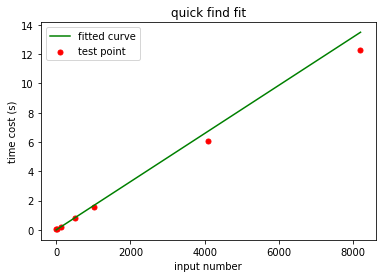

In [10]:
plt.figure()
plt.scatter(find_input, find_result, 25, 'r', label = 'test point')
plt.plot(find_x, find_y, 'g', label = 'fitted curve')
plt.legend(loc='upper left')
plt.title('quick find fit')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.savefig('./find fit.jpg')
plt.show()

In [11]:
union_c = optimize.curve_fit(n_1, union_input, union_result)[0]
union_c_2 = union_c * 1.1
union_x = np.arange(1, 8200, 1)
union_y = union_c_2*union_x
union_fit = [union_y[8], union_y[32], union_y[128], union_y[512], union_y[1024], union_y[4096], union_y[8192]]
np.savetxt('./union fit.txt', union_fit, fmt='%f')
print(union_c, union_c_2)

[6.14893045e-06] [6.7638235e-06]


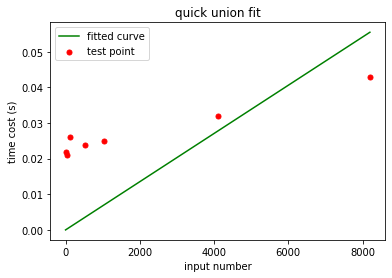

In [12]:
plt.figure()
plt.scatter(union_input, union_result, 25, 'r', label = 'test point')
plt.plot(union_x, union_y, 'g', label = 'fitted curve')
plt.legend(loc='upper left')
plt.title('quick union fit')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.savefig('./union fit.jpg')
plt.show()

In [17]:
weighted_c = optimize.curve_fit(n_1, weighted_input_2, weighted_result)[0]
weighted_c_2 = weighted_c * 1.3
weighted_x = np.arange(1, 8200, 1)
weighted_y = np.zeros(len(weighted_x))
for x in range(len(weighted_x)):
    weighted_y[x] = (weighted_c_2*math.log(weighted_x[x],2))
weighted_fit = [weighted_y[8], weighted_y[32], weighted_y[128], weighted_y[512], weighted_y[1024], weighted_y[4096], weighted_y[8192]]
np.savetxt('./weighted fit.txt', weighted_fit, fmt='%f')
print(weighted_c, weighted_c_2)

[0.00307223] [0.0039939]


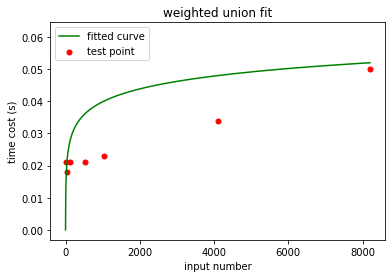

In [19]:
plt.figure()
plt.scatter(weighted_input, weighted_result, 25, 'r', label = 'test point')
plt.plot(weighted_x, weighted_y, 'g', label = 'fitted curve')
plt.legend(loc='upper left')
plt.title('weighted union fit')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.savefig('./weighted fit.jpg')
plt.show()